# Vehicle Loan Prediction Machine Learning Model

In this demonstration, I will be using basic machine learning to make predictions using data. I will visualize the predictions to see how well the model performed.

I will be using exploratory data analysis to identify variables with likely predictive power and feature engineering to transform the data. 

A logistic regression ans random tree forest prediction model will be built and compared using common evaluation metrics.


## Load and Clean the Data

In the experiment, I will be predicting vehicle loan defaults and creditworthiness of customers using variables with likely predictive power.

The data is collected from India.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, roc_curve, auc, precision_score, ConfusionMatrixDisplay

In [2]:
loan_df = pd.read_csv('vehicle_loans.csv', index_col='UNIQUEID')

In [3]:
loan_df.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
UNIQUEID,,,,,,,,,,,,,,,,,,,,,
420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,03-08-2018,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,26-09-2018,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,01-08-2018,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,26-10-2018,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,26-09-2018,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [4]:
#check the shape of the data 
print("Number of rows: ", loan_df.shape[0])
print("Number of columns: ", loan_df.shape[1])

Number of rows:  233154
Number of columns:  40


In [5]:
#check the variable type in each column

loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233154 entries, 420825 to 630213
Data columns (total 40 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   DISBURSED_AMOUNT                     233154 non-null  int64  
 1   ASSET_COST                           233154 non-null  int64  
 2   LTV                                  233154 non-null  float64
 3   BRANCH_ID                            233154 non-null  int64  
 4   SUPPLIER_ID                          233154 non-null  int64  
 5   MANUFACTURER_ID                      233154 non-null  int64  
 6   CURRENT_PINCODE_ID                   233154 non-null  int64  
 7   DATE_OF_BIRTH                        233154 non-null  object 
 8   EMPLOYMENT_TYPE                      225493 non-null  object 
 9   DISBURSAL_DATE                       233154 non-null  object 
 10  STATE_ID                             233154 non-null  int64  
 11  EMPLOYEE

There are 3 data types:
- int64 (whole number)
- float64 (floating point number)
- object (string or non-numeric)

Straight away there are some interesting things,

DATE_OF_BIRTH, EMPLOYMENT_TYPE, DISBURSAL_DATE, PERFORM_CNS_SCORE_DESCRIPTION, AVERAGE_ACCT_AGE and CREDIT_HISTORY_LENGTH are all object data types, meaning they contain non-numeric values such as strings or dates. 

EMPLOYMENT_TYPE has some missing values.

### Date Range

DISBURSAL_DATE contains the date the agreed loan amount was transferred to the applicant, it can be used to get an idea of the timeframe covered by the data 

The first step is to convert DISBURSAL_DATE to a datetime

In [6]:
loan_df['DISBURSAL_DATE'] = pd.to_datetime(loan_df['DISBURSAL_DATE'])

#the maximum and minimum dates
print("Maximum Disbursal Date: ", loan_df['DISBURSAL_DATE'].max())
print("Minium Disbursal Date: ", loan_df['DISBURSAL_DATE'].min())

#Timespan of dates
print("Timespan of Data Set: ", loan_df['DISBURSAL_DATE'].max() - loan_df['DISBURSAL_DATE'].min())

Maximum Disbursal Date:  2018-12-10 00:00:00
Minium Disbursal Date:  2018-01-08 00:00:00
Timespan of Data Set:  336 days 00:00:00


C:\Users\onwoc\anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-09-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\onwoc\anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-10-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\onwoc\anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-09-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\onwoc\anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '23-09-2018' in DD/MM/YYYY format. Provide format or specify in

### Target Variable
The variable that is trying to be predicted is the 'LOAN_DEFAULT', it helps to investigate it further.

In [7]:
#number of people whose loans defaulted
print(loan_df['LOAN_DEFAULT'].value_counts())

#percentage of loans which defaulted
print(loan_df['LOAN_DEFAULT'].value_counts(normalize=True))

0    182543
1     50611
Name: LOAN_DEFAULT, dtype: int64
0    0.782929
1    0.217071
Name: LOAN_DEFAULT, dtype: float64


The rate of defaulted loans is about 21.7%. Using seaborn, we can visualize the target variable.

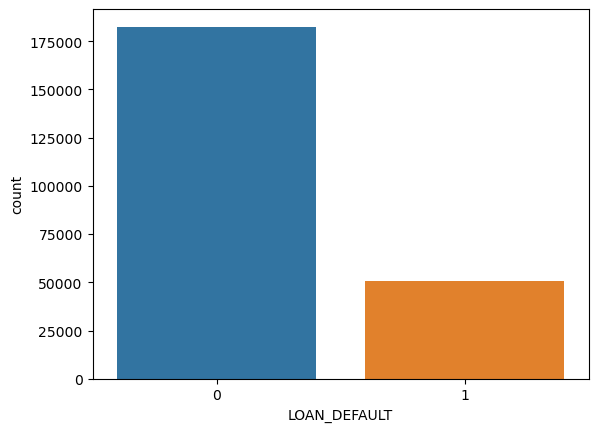

In [8]:
sns.countplot(x="LOAN_DEFAULT", data=loan_df)
plt.show()

### Missing Values

We saw earlier that our dataset contains some missing values, specifically for the EMPLOYMENT_TYPE column. 

In [9]:
loan_df.isnull().any()

DISBURSED_AMOUNT                       False
ASSET_COST                             False
LTV                                    False
BRANCH_ID                              False
SUPPLIER_ID                            False
MANUFACTURER_ID                        False
CURRENT_PINCODE_ID                     False
DATE_OF_BIRTH                          False
EMPLOYMENT_TYPE                         True
DISBURSAL_DATE                         False
STATE_ID                               False
EMPLOYEE_CODE_ID                       False
MOBILENO_AVL_FLAG                      False
AADHAR_FLAG                            False
PAN_FLAG                               False
VOTERID_FLAG                           False
DRIVING_FLAG                           False
PASSPORT_FLAG                          False
PERFORM_CNS_SCORE                      False
PERFORM_CNS_SCORE_DESCRIPTION          False
PRI_NO_OF_ACCTS                        False
PRI_ACTIVE_ACCTS                       False
PRI_OVERDU

In [10]:
#Identify the sum of missing values in EMPLOYMENT_TYPE
loan_df.isnull().sum()

DISBURSED_AMOUNT                          0
ASSET_COST                                0
LTV                                       0
BRANCH_ID                                 0
SUPPLIER_ID                               0
MANUFACTURER_ID                           0
CURRENT_PINCODE_ID                        0
DATE_OF_BIRTH                             0
EMPLOYMENT_TYPE                        7661
DISBURSAL_DATE                            0
STATE_ID                                  0
EMPLOYEE_CODE_ID                          0
MOBILENO_AVL_FLAG                         0
AADHAR_FLAG                               0
PAN_FLAG                                  0
VOTERID_FLAG                              0
DRIVING_FLAG                              0
PASSPORT_FLAG                             0
PERFORM_CNS_SCORE                         0
PERFORM_CNS_SCORE_DESCRIPTION             0
PRI_NO_OF_ACCTS                           0
PRI_ACTIVE_ACCTS                          0
PRI_OVERDUE_ACCTS               

The values_count can be used to print the distribution in the 'EMPLOYMENT_TYPE' column. This can be visualized. 

Self employed    127635
Salaried          97858
Name: EMPLOYMENT_TYPE, dtype: int64


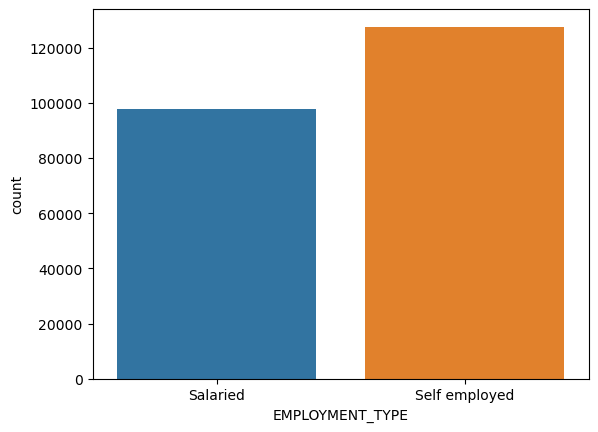

In [11]:
print(loan_df['EMPLOYMENT_TYPE'].value_counts())
sns.countplot(x="EMPLOYMENT_TYPE", data=loan_df)
plt.show()

Self employed    127635
Salaried          97858
Missing            7661
Name: EMPLOYMENT_TYPE, dtype: int64


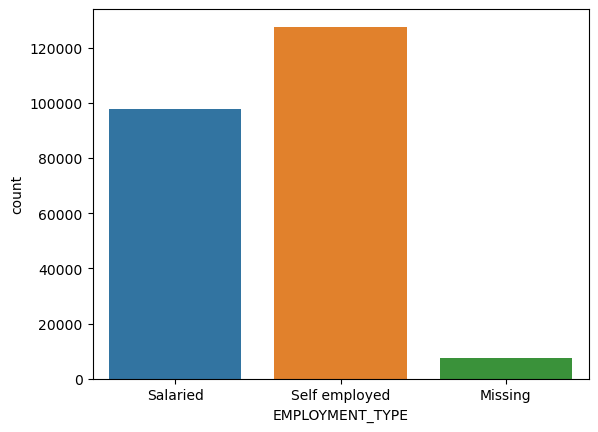

In [12]:
#fillna with 'missing'
loan_df = loan_df.fillna(value={'EMPLOYMENT_TYPE' : 'Missing'})

print(loan_df['EMPLOYMENT_TYPE'].value_counts())
sns.countplot(x="EMPLOYMENT_TYPE", data=loan_df)
plt.show()

### Dealing with Dates
There are two date columns, DISBURSAL_DATE and DATE_OF_BIRTH.
These should be transformed into a more algorithm friendly format.

An 'AGE' column will then be created to investigate if this age has a correlation with the target variable.

In [13]:
loan_df[['DISBURSAL_DATE', 'DATE_OF_BIRTH']].sample(5)

,DISBURSAL_DATE,DATE_OF_BIRTH
UNIQUEID,,
522512,2018-09-20,23-06-1992
525293,2018-09-21,15-05-1999
545349,2018-09-28,01-01-1991
603575,2018-10-23,12-07-1971
546686,2018-09-28,12-01-1982


In [14]:
#convert to datetime
loan_df['DATE_OF_BIRTH'] = pd.to_datetime(loan_df['DATE_OF_BIRTH'])
loan_df['DISBURSAL_DATE'] = pd.to_datetime(loan_df['DISBURSAL_DATE'])

#calculate their age at time of disbursal
loan_df['AGE'] = loan_df['DISBURSAL_DATE'] - loan_df['DATE_OF_BIRTH']
loan_df['AGE'] = loan_df['AGE'] // np.timedelta64(1, 'Y')

#Inspect the results
print(loan_df[['DATE_OF_BIRTH', 'AGE', 'DISBURSAL_DATE']].sample(n=5))

C:\Users\onwoc\AppData\Local\Temp\ipykernel_10140\1641484673.py:2: UserWarning: Parsing '31-07-1985' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  loan_df['DATE_OF_BIRTH'] = pd.to_datetime(loan_df['DATE_OF_BIRTH'])
C:\Users\onwoc\AppData\Local\Temp\ipykernel_10140\1641484673.py:2: UserWarning: Parsing '24-08-1985' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  loan_df['DATE_OF_BIRTH'] = pd.to_datetime(loan_df['DATE_OF_BIRTH'])
C:\Users\onwoc\AppData\Local\Temp\ipykernel_10140\1641484673.py:2: UserWarning: Parsing '30-12-1993' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  loan_df['DATE_OF_BIRTH'] = pd.to_datetime(loan_df['DATE_OF_BIRTH'])
C:\Users\onwoc\AppData\Local\Temp\ipykernel_10140\1641484673.py:2: UserWarning: Parsing '15-11-1991' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent

C:\Users\onwoc\AppData\Local\Temp\ipykernel_10140\1641484673.py:2: UserWarning: Parsing '21-05-1978' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  loan_df['DATE_OF_BIRTH'] = pd.to_datetime(loan_df['DATE_OF_BIRTH'])
C:\Users\onwoc\AppData\Local\Temp\ipykernel_10140\1641484673.py:2: UserWarning: Parsing '23-03-1977' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  loan_df['DATE_OF_BIRTH'] = pd.to_datetime(loan_df['DATE_OF_BIRTH'])
C:\Users\onwoc\AppData\Local\Temp\ipykernel_10140\1641484673.py:2: UserWarning: Parsing '18-06-1972' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  loan_df['DATE_OF_BIRTH'] = pd.to_datetime(loan_df['DATE_OF_BIRTH'])
C:\Users\onwoc\AppData\Local\Temp\ipykernel_10140\1641484673.py:2: UserWarning: Parsing '26-10-1976' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent

         DATE_OF_BIRTH  AGE DISBURSAL_DATE
UNIQUEID                                  
625107      1995-08-24   23     2018-10-26
461954      1990-06-18   28     2018-08-24
636493      1990-04-24   28     2018-10-29
610920      1987-11-03   30     2018-10-24
519720      1995-02-27   23     2018-09-19


C:\Users\onwoc\AppData\Local\Temp\ipykernel_10140\1641484673.py:2: UserWarning: Parsing '15-01-1957' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  loan_df['DATE_OF_BIRTH'] = pd.to_datetime(loan_df['DATE_OF_BIRTH'])
C:\Users\onwoc\AppData\Local\Temp\ipykernel_10140\1641484673.py:2: UserWarning: Parsing '22-09-1998' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  loan_df['DATE_OF_BIRTH'] = pd.to_datetime(loan_df['DATE_OF_BIRTH'])
C:\Users\onwoc\AppData\Local\Temp\ipykernel_10140\1641484673.py:2: UserWarning: Parsing '27-12-1957' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  loan_df['DATE_OF_BIRTH'] = pd.to_datetime(loan_df['DATE_OF_BIRTH'])
C:\Users\onwoc\AppData\Local\Temp\ipykernel_10140\1641484673.py:2: UserWarning: Parsing '24-03-1976' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent

At this point, I do not know how the disbursal date might be related to loan defaults. I want to explore this relationship so need to convert to a numeric representation

In [15]:
loan_df['DISBURSAL_MONTH'] = loan_df['DISBURSAL_DATE'].dt.month
loan_df['DISBURSAL_MONTH'].value_counts()

10    84875
8     56975
9     54443
11     6709
6      5991
12     5613
3      5148
4      4627
7      4150
5      2890
1      1708
2        25
Name: DISBURSAL_MONTH, dtype: int64

As we can see, the distribution of loan disbursals is not even across all months.

The DISBURSAL_DATE and DATE_OF_BIRTH can be dropped from the data

In [16]:
#drop columns
loan_df = loan_df.drop(['DISBURSAL_DATE', 'DATE_OF_BIRTH'], axis=1)

### Fix the Strings

AVERAGE_ACCT_AGE and CREDIT_HISTORY_LENGTH were also strings but column names suggest they should be numeric.


In [17]:
loan_df[['CREDIT_HISTORY_LENGTH', 'AVERAGE_ACCT_AGE']].sample(n=10)

,CREDIT_HISTORY_LENGTH,AVERAGE_ACCT_AGE
UNIQUEID,,
592271,0yrs 0mon,0yrs 0mon
551692,0yrs 0mon,0yrs 0mon
557959,0yrs 0mon,0yrs 0mon
626915,0yrs 8mon,0yrs 8mon
554754,0yrs 0mon,0yrs 0mon
560027,0yrs 0mon,0yrs 0mon
494375,0yrs 0mon,0yrs 0mon
640586,0yrs 0mon,0yrs 0mon
494213,0yrs 0mon,0yrs 0mon


Both columns contain measures of time in the format "0yrs 0mon"

This string representation is not useful for analysis or prediction so let's convert it into a number.

The can both be converted into months for the information to be more helpful and stored in the dataframe.

To do this, I will create 2 helper functions.

The first is 'calc_months'. This helps us to convert the number of years to months.

In [18]:
#function to help convert to months
def calc_months(str_list):  
    years = int(str_list[0])
    months = int(str_list[1])

    num_months = (years * 12) + months
    return num_months

Before this function can be used, we need to extract the intergers in the string. The '\d+' is a regular expression which finds intergers in a string.

A new column will be created for the AVERAGE_ACCT_AGE and CREDIT_HISTORY_LENGTH that will have the number of months.

We will then use the map function to apply a function which calculates the total number of months for each row in the data frame.
This is where the second helper function comes in.

In [19]:
# function to create new columns
def convert_str_to_months(col_name):
    new_col = col_name + '_MONTHS'
    loan_df[new_col] = loan_df[col_name].str.findall('\d+')
    loan_df[new_col] = loan_df[new_col].map(calc_months)

In [20]:
#The two new columns will be created using the helper functions and compared

convert_str_to_months('CREDIT_HISTORY_LENGTH')
convert_str_to_months('AVERAGE_ACCT_AGE')

loan_df[['CREDIT_HISTORY_LENGTH_MONTHS', 'CREDIT_HISTORY_LENGTH','AVERAGE_ACCT_AGE_MONTHS','AVERAGE_ACCT_AGE']].sample(n=5)

,CREDIT_HISTORY_LENGTH_MONTHS,CREDIT_HISTORY_LENGTH,AVERAGE_ACCT_AGE_MONTHS,AVERAGE_ACCT_AGE
UNIQUEID,,,,
471451,7,0yrs 7mon,7,0yrs 7mon
617149,0,0yrs 0mon,0,0yrs 0mon
534291,18,1yrs 6mon,15,1yrs 3mon
522012,0,0yrs 0mon,0,0yrs 0mon
474094,0,0yrs 0mon,0,0yrs 0mon


Now, we can drop the columns that are no longer needed.

In [21]:
loan_df = loan_df.drop(['AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH'], axis=1)

### Exploratory Data Analysis


In [22]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233154 entries, 420825 to 630213
Data columns (total 40 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   DISBURSED_AMOUNT                     233154 non-null  int64  
 1   ASSET_COST                           233154 non-null  int64  
 2   LTV                                  233154 non-null  float64
 3   BRANCH_ID                            233154 non-null  int64  
 4   SUPPLIER_ID                          233154 non-null  int64  
 5   MANUFACTURER_ID                      233154 non-null  int64  
 6   CURRENT_PINCODE_ID                   233154 non-null  int64  
 7   EMPLOYMENT_TYPE                      233154 non-null  object 
 8   STATE_ID                             233154 non-null  int64  
 9   EMPLOYEE_CODE_ID                     233154 non-null  int64  
 10  MOBILENO_AVL_FLAG                    233154 non-null  int64  
 11  AADHAR_F

In [23]:
#investigate unique values
loan_df.nunique()

DISBURSED_AMOUNT                       24565
ASSET_COST                             46252
LTV                                     6579
BRANCH_ID                                 82
SUPPLIER_ID                             2953
MANUFACTURER_ID                           11
CURRENT_PINCODE_ID                      6698
EMPLOYMENT_TYPE                            3
STATE_ID                                  22
EMPLOYEE_CODE_ID                        3270
MOBILENO_AVL_FLAG                          1
AADHAR_FLAG                                2
PAN_FLAG                                   2
VOTERID_FLAG                               2
DRIVING_FLAG                               2
PASSPORT_FLAG                              2
PERFORM_CNS_SCORE                        573
PERFORM_CNS_SCORE_DESCRIPTION             20
PRI_NO_OF_ACCTS                          108
PRI_ACTIVE_ACCTS                          40
PRI_OVERDUE_ACCTS                         22
PRI_CURRENT_BALANCE                    71341
PRI_SANCTI

- MOBILE_AVL_FLAG has only one unique value! 

since every row contains the same value, the column can be dropped.

In [24]:
loan_df = loan_df.drop(['MOBILENO_AVL_FLAG'], axis = 1)

We can investigate the IDs further.

In [25]:
#Sample the Id columns
loan_df[['BRANCH_ID','SUPPLIER_ID','MANUFACTURER_ID','CURRENT_PINCODE_ID','STATE_ID','EMPLOYEE_CODE_ID']].sample(10)

,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,STATE_ID,EMPLOYEE_CODE_ID
UNIQUEID,,,,,,
623137,152,18399,51,6066,3,372
523802,152,17795,86,4911,3,561
474818,73,17786,45,272,11,1714
581453,63,16067,45,7084,10,360
649436,248,24100,86,1754,4,1451
617958,248,22839,51,1762,4,383
548363,36,22286,86,6536,13,1741
528703,34,21156,86,1027,6,9
624109,165,21854,86,6486,5,2854


These six fields contain numeric data, but really they represent categorical, underordered information. For example, we cannot say things like manufacturer id 1 < 2, or state id 1 = 3 - 2. 

ID fields with large numbers of unique values will introduce complexity into our predictive model

In [26]:
#drop SUPPLIER_ID, CURRENT_PINCODE_ID, EMPLOYEE_CODE_ID, BRANCH_ID
loan_df=loan_df.drop(['SUPPLIER_ID','CURRENT_PINCODE_ID','EMPLOYEE_CODE_ID','BRANCH_ID'], axis=1)

### Categorical Variables

I will further explore the relationship between the categorical variables. I will be creating a function called 'explore_categorical' that will group the categorical variables according to the loan default count.
A plot will then visualize the groupings.


In [27]:
def explore_categorical(col_name):   
    print("{0} Summary".format(col_name))
    print("\n")

    print("{0} Counts".format(col_name))
    print(loan_df[col_name].value_counts())
    print("\n")

    print("{0} Ratio".format(col_name))
    print(loan_df[col_name].value_counts(normalize=True))
    print("\n")

    print("{0} Default Counts".format(col_name))
    print(loan_df.groupby(col_name)['LOAN_DEFAULT'].value_counts().unstack(level=-1))
    print("\n")

    print("{0} Default Ratio".format(col_name))
    print(loan_df.groupby(col_name)['LOAN_DEFAULT'].value_counts(normalize=True).unstack(level=-1))
    print("\n")

    sns.catplot(data=loan_df,kind='count',x=col_name,hue='LOAN_DEFAULT')
    plt.show()

Let us explore the Manufacturer_ID and disbursal_month

MANUFACTURER_ID Summary


MANUFACTURER_ID Counts
86     109534
45      56626
51      27204
48      16710
49      10220
120      9658
67       2405
145       778
153        12
152         6
156         1
Name: MANUFACTURER_ID, dtype: int64


MANUFACTURER_ID Ratio
86     0.469792
45     0.242870
51     0.116678
48     0.071669
49     0.043834
120    0.041423
67     0.010315
145    0.003337
153    0.000051
152    0.000026
156    0.000004
Name: MANUFACTURER_ID, dtype: float64


MANUFACTURER_ID Default Counts
LOAN_DEFAULT           0        1
MANUFACTURER_ID                  
45               43687.0  12939.0
48               12156.0   4554.0
49                7984.0   2236.0
51               21547.0   5657.0
67                1882.0    523.0
86               87124.0  22410.0
120               7526.0   2132.0
145                622.0    156.0
152                  6.0      NaN
153                  8.0      4.0
156                  1.0      NaN


MANUFACTURER_ID Default Ratio
LOAN_DEFAULT    

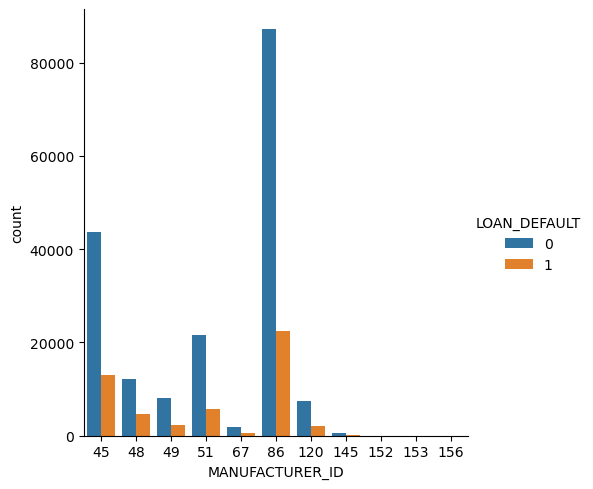

In [28]:
explore_categorical('MANUFACTURER_ID')

DISBURSAL_MONTH Summary


DISBURSAL_MONTH Counts
10    84875
8     56975
9     54443
11     6709
6      5991
12     5613
3      5148
4      4627
7      4150
5      2890
1      1708
2        25
Name: DISBURSAL_MONTH, dtype: int64


DISBURSAL_MONTH Ratio
10    0.364030
8     0.244366
9     0.233507
11    0.028775
6     0.025695
12    0.024074
3     0.022080
4     0.019845
7     0.017799
5     0.012395
1     0.007326
2     0.000107
Name: DISBURSAL_MONTH, dtype: float64


DISBURSAL_MONTH Default Counts
LOAN_DEFAULT         0      1
DISBURSAL_MONTH              
1                 1316    392
2                   23      2
3                 4094   1054
4                 3636    991
5                 2279    611
6                 4697   1294
7                 3222    928
8                44938  12037
9                43910  10533
10               64474  20401
11                5484   1225
12                4470   1143


DISBURSAL_MONTH Default Ratio
LOAN_DEFAULT            0         1
DISBURSA

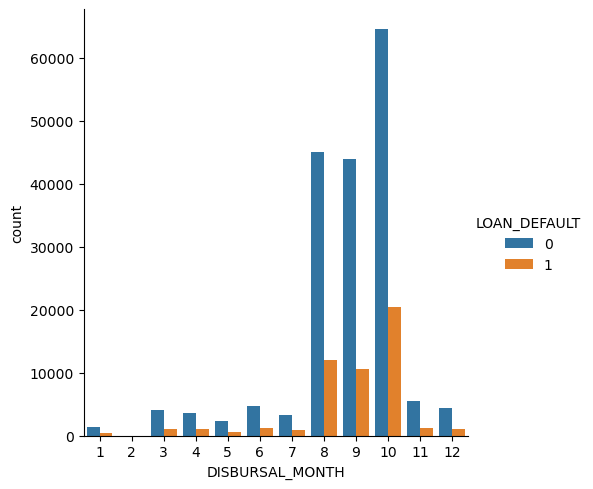

In [29]:
explore_categorical('DISBURSAL_MONTH')

- Looks like loans for some manufacturers default at higher rates than others!
- Cars from manufacturer 48 defaulted most frequently. *With the exception of 153 which only had 12 total loans which is not enough data to give us solid insight*
- The vast majority of loans were disbursed in August, September and October 
- Loans disbursed in October had the highest rate of default ~24%

### Continuous Variables
Like the categorical variables, we can also explore the continuous variables using a function.

Firstly, we can look at the mean, median, IQR, standard deviation and min/max to get an idea of the range of data and how it is distributed.

These statistical summaries can then be visualized wiith a boxplot and distplot function.

We can also look deeper by exploring the relationship between the continuous variables and the target variable.

as an example, I will explore 'AGE' and 'DISBURSED_AMOUNT'

In [30]:
def explore_continuous(col_name):
    #print statistical summary
    print("{0} Summary".format(col_name))
    print("\n")
    print(loan_df[col_name].describe())
    print("\n")

    #Look at boxplot
    sns.boxplot(x=col_name, data=loan_df)
    plt.show()

    #Look at the distribution
    sns.distplot(loan_df[col_name], hist=False)
    plt.show()

    #Now lets look deeper by grouping with the target variable 
    print("{0} Grouped Summary".format(col_name))
    print("\n")
    print(loan_df.groupby('LOAN_DEFAULT')[col_name].describe())

    #look at grouped boxplot 
    sns.boxplot(x=col_name, y='LOAN_DEFAULT', data=loan_df, orient="h")
    plt.show()

AGE Summary


count    233154.000000
mean         33.902871
std           9.829475
min          17.000000
25%          26.000000
50%          32.000000
75%          41.000000
max          69.000000
Name: AGE, dtype: float64




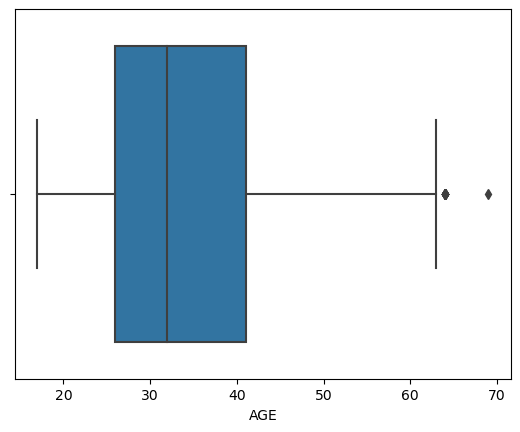

C:\Users\onwoc\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


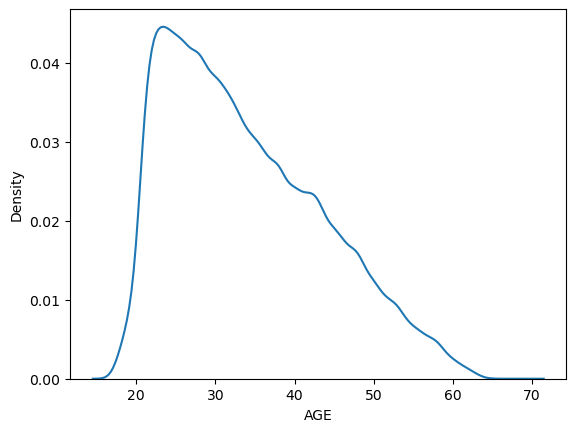

AGE Grouped Summary


                 count       mean       std   min   25%   50%   75%   max
LOAN_DEFAULT                                                             
0             182543.0  34.090713  9.860825  17.0  26.0  32.0  41.0  69.0
1              50611.0  33.225366  9.685441  17.0  25.0  31.0  40.0  64.0


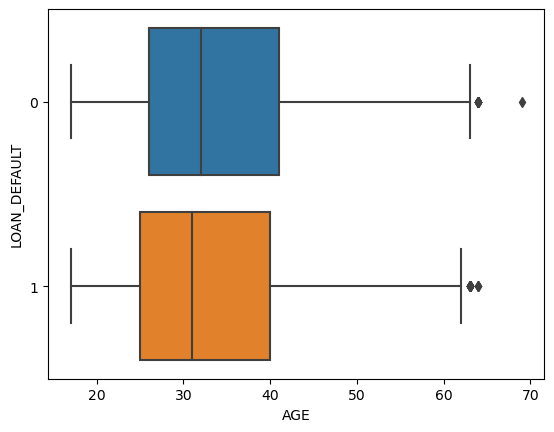

In [31]:
explore_continuous('AGE')

DISBURSED_AMOUNT Summary


count    233154.000000
mean      54356.993528
std       12971.314171
min       13320.000000
25%       47145.000000
50%       53803.000000
75%       60413.000000
max      990572.000000
Name: DISBURSED_AMOUNT, dtype: float64




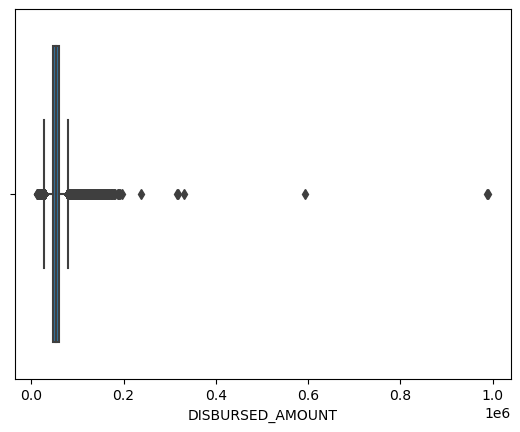

C:\Users\onwoc\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


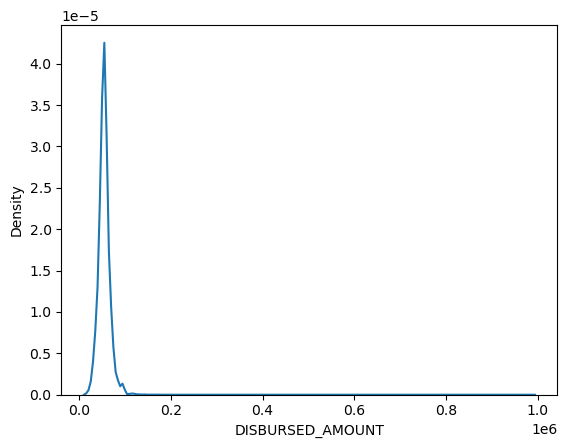

DISBURSED_AMOUNT Grouped Summary


                 count          mean           std      min      25%      50%  \
LOAN_DEFAULT                                                                    
0             182543.0  53826.471111  13140.699007  13320.0  46369.0  53303.0   
1              50611.0  56270.473869  12150.255527  13369.0  49303.0  55459.0   

                  75%       max  
LOAN_DEFAULT                     
0             59947.0  990572.0  
1             61947.0  191392.0  


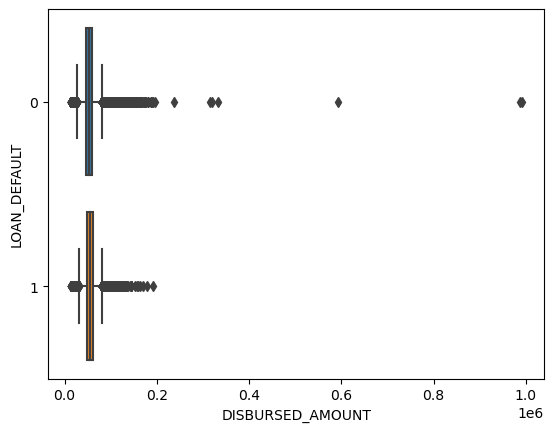

In [32]:
explore_continuous('DISBURSED_AMOUNT')

Things to note 
- The distribution of AGE within the group of people who defaulted was marginally younger! 
- There are some huge outliers in the 'DISBURSED_AMOUNT' column.
- Generally, the disbursed amount for defaulted loans was larger, or at least the distribution ranges over larger values.

### Feature Engineering
It can be seen from exploring the 'DISBURSED_AMOUNT' that there are extreme outliers but further investigation proves it to be resonable given the data is from INDIA.

One way we can keep extreme values without them skewing the data is through binning
- Creating categorical groups from continuous variables 
- These bins are used to categorize our rows based on their disbursed amounts


In [33]:
disbursed_buckets = [13000, 30000, 45000, 60000, 75000, 150000, 1000000]
disbursed_labels = ['13k - 30k', '30k - 45k', '45k - 60k', '60k - 75k', '75k - 150k', '150k - 1m']

loan_df['DISBURSED_CAT'] = pd.cut(loan_df['DISBURSED_AMOUNT'], disbursed_buckets, labels=disbursed_labels)

DISBURSED_CAT Summary


DISBURSED_CAT Counts
45k - 60k     126904
60k - 75k      49824
30k - 45k      40626
75k - 150k     10871
13k - 30k       4865
150k - 1m         64
Name: DISBURSED_CAT, dtype: int64


DISBURSED_CAT Ratio
45k - 60k     0.544293
60k - 75k     0.213696
30k - 45k     0.174245
75k - 150k    0.046626
13k - 30k     0.020866
150k - 1m     0.000274
Name: DISBURSED_CAT, dtype: float64


DISBURSED_CAT Default Counts
LOAN_DEFAULT       0      1
DISBURSED_CAT              
13k - 30k       4207    658
30k - 45k      34323   6303
45k - 60k      98830  28074
60k - 75k      37056  12768
75k - 150k      8070   2801
150k - 1m         57      7


DISBURSED_CAT Default Ratio
LOAN_DEFAULT          0         1
DISBURSED_CAT                    
13k - 30k      0.864748  0.135252
30k - 45k      0.844853  0.155147
45k - 60k      0.778778  0.221222
60k - 75k      0.743738  0.256262
75k - 150k     0.742342  0.257658
150k - 1m      0.890625  0.109375




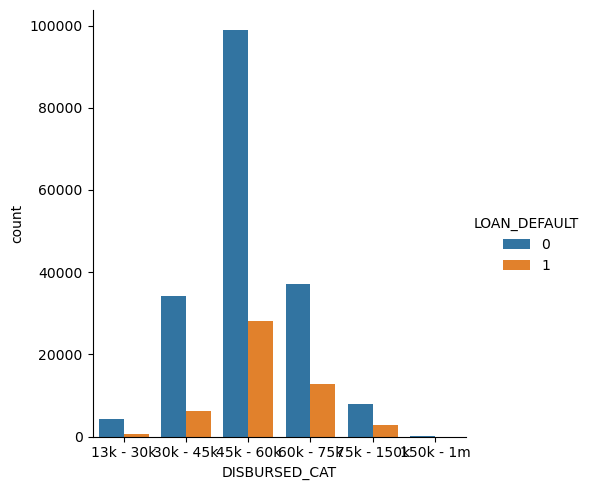

In [34]:
explore_categorical('DISBURSED_CAT')

Notice that the vast majority of loans fall in the '45k - 60k' bucket. 

Also, the higher the loan amount, the more likely it was to default except for loans in the very largest category

### Combine Features

lets create a DISBURSAL_DIFFERENCE column which will be the difference between the ASSET_COST and the DISBURSED_AMOUNT

In [35]:
loan_df['DISBURSAL_DIFFERENCE'] = loan_df['ASSET_COST'] - loan_df['DISBURSED_AMOUNT']

loan_df[['DISBURSAL_DIFFERENCE', 'ASSET_COST', 'DISBURSED_AMOUNT']].sample(5)


,DISBURSAL_DIFFERENCE,ASSET_COST,DISBURSED_AMOUNT
UNIQUEID,,,
558574,9164,66477,57313
459265,33157,84460,51303
431141,15137,69400,54263
563566,8591,64250,55659
552433,15642,75089,59447


#### Primary and Secondary Account Engineering

The loan data contains 14 columns providing information about any existing loans a customer may have. This data is split according to primary and secondary accounts, a primary account is a loan where the customer is the sole recipient of the disbursal, 
a secondary account is one where the customer is a co-applicant or guarantor for the loan.

- PRI_NO_OF_ACCTS: count of total loans taken by the customer at the time of disbursement  
- PRI_ACTIVE_ACCTS: count of active loans taken by the customer at the time of disbursement
- PRI_OVERDUE_ACCTS: count of default accounts at the time of disbursement    
- PRI_CURRENT_BALANCE: total Principal outstanding amount of the active loans at the time of disbursement        
- PRI_SANCTIONED_AMOUNT: total amount that was sanctioned for all the loans at the time of disbursement  
- PRI_DISBURSED_AMOUNT: total amount that was disbursed for all the loans at the time of disbursement
- PRIMARY_INSTAL_AMT: EMI Amount of the primary loan
- SEC_NO_OF_ACCTS: count of secondary total loans taken by the customer at the time of disbursement 
- SEC_ACTIVE_ACCTS: count of secondary active loans taken by the customer at the time of disbursement 
- SEC_OVERDUE_ACCTS: count of secondary accounts at the time of disbursement    
- SEC_CURRENT_BALANCE: total Principal outstanding amount of the secondary active loans at the time of disbursement 
- SEC_SANCTIONED_AMOUNT: total amount that was sanctioned for all the secondary loans at the time of disbursement  
- SEC_DISBURSED_AMOUNT: total amount that was disbursed for all the secondary loans at the time of disbursement
- SEC_INSTAL_AMT: EMI Amount of the secondary loan 

We can create a function that adds all the primary and secondary accounts

In [36]:
def newtotalcol(pri, sec):
    total='TOTAL'+ sec[3:]
    
    loan_df[total]= loan_df[pri]+loan_df[sec]

In [37]:
newtotalcol('PRI_NO_OF_ACCTS', 'SEC_NO_OF_ACCTS')
newtotalcol('PRI_ACTIVE_ACCTS', 'SEC_ACTIVE_ACCTS')
newtotalcol('PRI_OVERDUE_ACCTS', 'SEC_OVERDUE_ACCTS')
newtotalcol('PRI_CURRENT_BALANCE', 'SEC_CURRENT_BALANCE')
newtotalcol('PRI_SANCTIONED_AMOUNT', 'SEC_SANCTIONED_AMOUNT')
newtotalcol('PRI_DISBURSED_AMOUNT', 'SEC_DISBURSED_AMOUNT')
newtotalcol('PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT')

In [38]:
#drop columns that are no longer needed
drop_cols = ['PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 'SEC_INSTAL_AMT']

loan_df = loan_df.drop(drop_cols, axis=1)

#check shape
loan_df.shape

(233154, 30)

I am also interested in calculating the percentage of the overdue accounts

In [39]:
loan_df['OVERDUE_PCT'] = loan_df['TOTAL_OVERDUE_ACCTS'] / loan_df['TOTAL_NO_OF_ACCTS']

In [40]:
#check for missing values
loan_df['OVERDUE_PCT'].isnull().sum()

115792

In [41]:
#fill missing values
loan_df['OVERDUE_PCT']=loan_df['OVERDUE_PCT'].fillna(0)

#double check missing values
loan_df['OVERDUE_PCT'].isnull().sum()

0

In [42]:
#check dataframe info
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233154 entries, 420825 to 630213
Data columns (total 31 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   DISBURSED_AMOUNT                     233154 non-null  int64   
 1   ASSET_COST                           233154 non-null  int64   
 2   LTV                                  233154 non-null  float64 
 3   MANUFACTURER_ID                      233154 non-null  int64   
 4   EMPLOYMENT_TYPE                      233154 non-null  object  
 5   STATE_ID                             233154 non-null  int64   
 6   AADHAR_FLAG                          233154 non-null  int64   
 7   PAN_FLAG                             233154 non-null  int64   
 8   VOTERID_FLAG                         233154 non-null  int64   
 9   DRIVING_FLAG                         233154 non-null  int64   
 10  PASSPORT_FLAG                        233154 non-null  int64   


## Lesson 3 - Scaling 
- We will use min max scaling to bring our continuous variables into the same range 
- Outliers have been observed in the data. However, we will keep them as they appear to be legitimate

First, we create a list of our continuous columns 
- We can use this list to select the continuous variables from our dataframe without typing a long list of column names each time 
- We don't need to scale our categoricals or binaries

In [43]:
numeric_cols = ['DISBURSED_AMOUNT', 
                'ASSET_COST', 
                'LTV', 
                'NEW_ACCTS_IN_LAST_SIX_MONTHS', 
                'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 
                'NO_OF_INQUIRIES', 
                'AGE', 
                'AVERAGE_ACCT_AGE_MONTHS', 
                'CREDIT_HISTORY_LENGTH_MONTHS',
                'PERFORM_CNS_SCORE',
                'TOTAL_NO_OF_ACCTS',
                'TOTAL_ACTIVE_ACCTS',
                'TOTAL_OVERDUE_ACCTS',
                'TOTAL_CURRENT_BALANCE', 
                'TOTAL_SANCTIONED_AMOUNT', 
                'TOTAL_DISBURSED_AMOUNT', 
                'TOTAL_INSTAL_AMT', 
                'OVERDUE_PCT', 
                'DISBURSAL_DIFFERENCE']

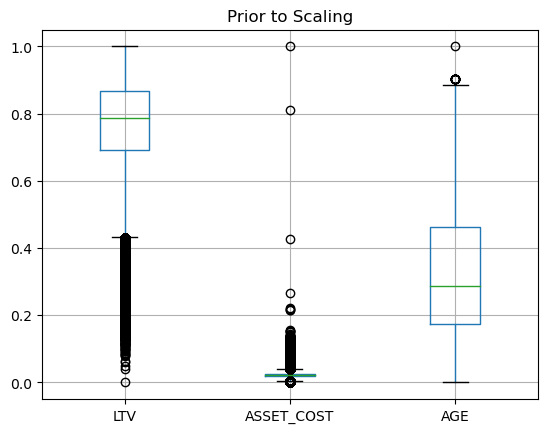

In [44]:
#create instance of min max scaler
mm_scaler=MinMaxScaler()

#apply fit transform
loan_df[numeric_cols]=mm_scaler.fit_transform(loan_df[numeric_cols])

#visualize transformed column
loan_df[['LTV', 'ASSET_COST', 'AGE']].boxplot()
plt.title('Prior to Scaling')
plt.show()

### Linear Classifiers

### Train/Test Split
We will create a simple linear classifier using logistic regression.

It is important that our classifier recognises categorical variables where appropriate.

We do not want to treat MANUFACTURER_ID, STATE_ID and DISBURSAL_MONTH as integers. We can encode our categorical columns with the category data type

In [45]:
category_cols = ['MANUFACTURER_ID', 'STATE_ID', 'DISBURSAL_MONTH', 'DISBURSED_CAT', 'PERFORM_CNS_SCORE_DESCRIPTION', 'EMPLOYMENT_TYPE']

loan_df[category_cols] = loan_df[category_cols].astype('category')

loan_df[category_cols].dtypes


MANUFACTURER_ID                  category
STATE_ID                         category
DISBURSAL_MONTH                  category
DISBURSED_CAT                    category
PERFORM_CNS_SCORE_DESCRIPTION    category
EMPLOYMENT_TYPE                  category
dtype: object

- To keep our first model simple, select 6 variables including 'LOAN_DEFAULT' and 'DISBURSED_CAT'
- Using these variables create a subset of loan_df and store it as a separate DataFrame loan_df_sml
- I have selected the following 6 columns, 'STATE_ID', 'LTV', 'DISBURSED_CAT', 'PERFORM_CNS_SCORE', 'DISBURSAL_MONTH', 'LOAN_DEFAULT'

In [46]:
small_cols = ['STATE_ID', 'LTV', 'DISBURSED_CAT', 'PERFORM_CNS_SCORE', 'DISBURSAL_MONTH', 'LOAN_DEFAULT']

loan_df_sml = loan_df[small_cols]

print(loan_df_sml.shape)

loan_df_sml.info()

(233154, 6)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 233154 entries, 420825 to 630213
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   STATE_ID           233154 non-null  category
 1   LTV                233154 non-null  float64 
 2   DISBURSED_CAT      233154 non-null  category
 3   PERFORM_CNS_SCORE  233154 non-null  float64 
 4   DISBURSAL_MONTH    233154 non-null  category
 5   LOAN_DEFAULT       233154 non-null  int64   
dtypes: category(3), float64(2), int64(1)
memory usage: 7.8 MB


 Before fitting (train) the basic linear model we need to split our data into training and test sets.
- Training Data: used to fit the model to our specific data
- Test Data: used to test the predictive power of the trained model

- x: all of the rows and columns except the target variable 
- y: all of the rows but just the target variable column

In [47]:
x = loan_df_sml.drop(['LOAN_DEFAULT'], axis=1)
y = loan_df_sml['LOAN_DEFAULT']

print("x has {0} rows and {1} columns".format(x.shape[0], x.shape[1]))
print("y has {0} rows".format(y.count()))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print('---------')
print("x_train has {0} rows and {1} columns".format(x_train.shape[0], x_train.shape[1]))
print("x_test has {0} rows and {1} columns".format(x_test.shape[0], x_test.shape[1]))
print("y_train has {0} rows".format(y_train.count()))
print("y_test has {0} rows".format(y_test.count()))

x has 233154 rows and 5 columns
y has 233154 rows
---------
x_train has 186523 rows and 5 columns
x_test has 46631 rows and 5 columns
y_train has 186523 rows
y_test has 46631 rows


Like most machine learning methods, logistic regression does not know how to deal with string data

We can use pd.get_dummies to one hot encode the categorical variables

In [48]:
loan_data_dumm = pd.get_dummies(loan_df_sml, prefix_sep='_', drop_first=True)

In [49]:
loan_data_dumm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233154 entries, 420825 to 630213
Data columns (total 40 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   LTV                       233154 non-null  float64
 1   PERFORM_CNS_SCORE         233154 non-null  float64
 2   LOAN_DEFAULT              233154 non-null  int64  
 3   STATE_ID_2                233154 non-null  uint8  
 4   STATE_ID_3                233154 non-null  uint8  
 5   STATE_ID_4                233154 non-null  uint8  
 6   STATE_ID_5                233154 non-null  uint8  
 7   STATE_ID_6                233154 non-null  uint8  
 8   STATE_ID_7                233154 non-null  uint8  
 9   STATE_ID_8                233154 non-null  uint8  
 10  STATE_ID_9                233154 non-null  uint8  
 11  STATE_ID_10               233154 non-null  uint8  
 12  STATE_ID_11               233154 non-null  uint8  
 13  STATE_ID_12               233154 non-nu

In [50]:
x = loan_data_dumm.drop(['LOAN_DEFAULT'], axis=1)
y = loan_data_dumm['LOAN_DEFAULT']


print("x has {0} rows and {1} columns".format(x.shape[0], x.shape[1]))
print("y has {0} rows".format(y.count()))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

x has 233154 rows and 39 columns
y has 233154 rows
0    0.783099
1    0.216901
Name: LOAN_DEFAULT, dtype: float64
0    0.782248
1    0.217752
Name: LOAN_DEFAULT, dtype: float64


In [51]:
#fit the model
logistic_model = LogisticRegression(max_iter=200)
logistic_model.fit(x_train, y_train)

LogisticRegression(max_iter=200)

In [52]:
#generate predictions for test set
pred = logistic_model.predict(x_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

The score function generates predictions and compares the predicted class with the actual class. The output is a floating-point number between 0 and 1 telling us the percentage of loans we correctly classified!

In [53]:
logistic_model.score(x_test, y_test)

0.7822907507881023

Looks like our model performed quite well, it predicted 78% of our test cases correctly.

### Model Evaluation
I will create two functions, the first one that will help plot a roc curve which will then be used to evaluate the model in another function. 

The evaluation model function will create a simple confusion matrix which is a 2D array of the True Negative, False Positive, False Negative and True Positve. These can be combined to find:
- Precision = TP/(TP+FP) how many actual positive predictions were correct
- Recall = TP/(TP+FN) how many of the actual positive cases were correctly classified
- F1 Score= 2((precision * recall)/(precision + recall)) Useful when a balance is needed between precision and recall

The function will then look at class percentage splits and probability distributions

In [54]:
#function to plot roc curve
def plot_roc_curve(fpr, tpr, roc_auc):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [55]:
#function to evaluate model
def eval_model(model, x_test, y_test):
    preds = model.predict(x_test)
    probs = model.predict_proba(x_test)

    accuracy = accuracy_score(y_test, preds)
    recall = recall_score(y_test, preds)
    precision = precision_score(y_test, preds)
    f1 = f1_score(y_test, preds)

    conf_mat=confusion_matrix(y_test,pred)
    display=ConfusionMatrixDisplay(conf_mat)
    display.plot()
    plt.show() 

    print("\n")
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1: ", f1)

    #Show ROC Curve
    fpr, tpr, threshold = roc_curve(y_test, probs[:,1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    print("AUC: ", roc_auc)

    plot_roc_curve(fpr, tpr, roc_auc)

    results_df = pd.DataFrame()
    results_df['true_class'] = y_test
    results_df['predicted_class'] = list(preds)
    results_df['default_prob'] = probs[:, 1]

    #plot the distribution of probabilities for the estimated classes
    sns.distplot(results_df[results_df['true_class'] == 0]['default_prob'], label="No Default", hist=False)
    sns.distplot(results_df[results_df['true_class'] == 1]['default_prob'], label="Default", hist=False)
    plt.show()

    #see the true class versus predicted class as a percentage
    print(results_df.groupby('true_class')['predicted_class'].value_counts(normalize=True))

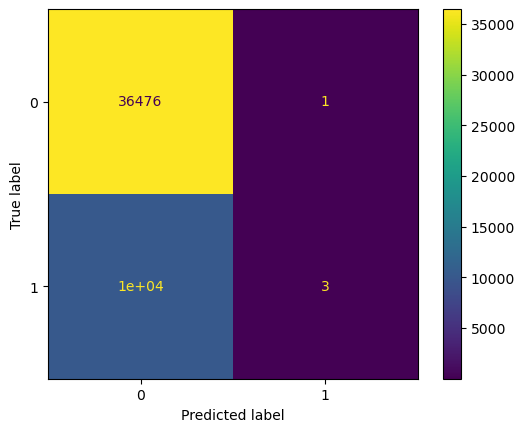



Accuracy:  0.7822907507881023
Precision:  0.75
Recall:  0.00029545006893834944
F1:  0.0005906674542232723
AUC:  0.6095826873273879


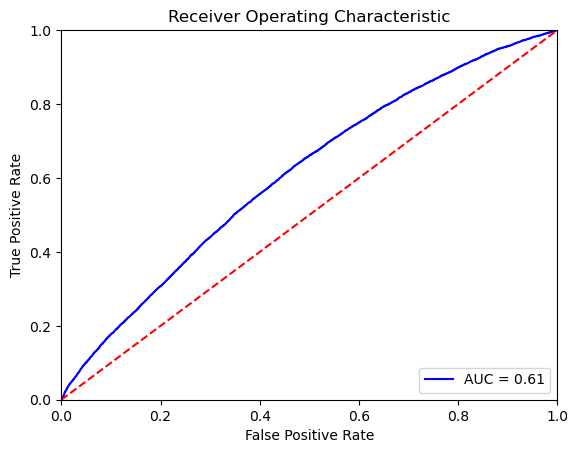

C:\Users\onwoc\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\onwoc\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


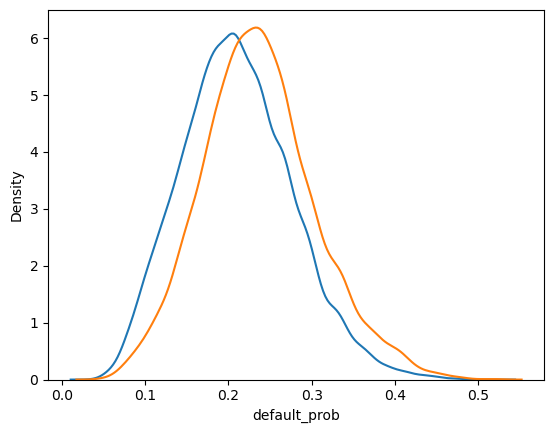

true_class  predicted_class
0           0                  0.999973
            1                  0.000027
1           0                  0.999705
            1                  0.000295
Name: predicted_class, dtype: float64


In [56]:
eval_model(logistic_model, x_test, y_test)

It can be seen that the accuracy of the model is 78% but this can be misleading.
Out of the positive predictions, 75% were actually positive. Although, we can see from the confusion matrix that the model  only predicted a small number of instances as positive.
Recall of ~0.0003, we hardly identified any of the loan defaults, this shows that this model is not reliable.
Our model has an AUC of ~0.61
- The AUC score for a random classifier is 0.5 and the model is not doing a good job of separating the classes 

The chart below the roc curve shows that the model has very poor separability

### Random Forest

In this section, I will use the random forest classifier to build a random forest model for the data.

I will create a function that creates the training/tesr sets and dummy variables 

In [57]:
def encode_and_split(loan_df):
    loan_data_dumm = pd.get_dummies(loan_df, prefix_sep='_', drop_first=True)

    x = loan_data_dumm.drop(['LOAN_DEFAULT'], axis=1)
    y = loan_data_dumm['LOAN_DEFAULT']

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    return x_train, x_test, y_train, y_test

In [58]:
x_train, x_test, y_train, y_test = encode_and_split(loan_df)

print("Training Features Shape", x_train.shape)
print("Training Label Rows", y_train.count())
print('-------------------------')
print("Testing Features Shape", x_test.shape)
print("Testing Label Rows", y_test.count())
print('-------------------------')
print("Testing Features Shape", x_test.shape)
print("Testing Label Rows", y_test.count())

Training Features Shape (186523, 92)
Training Label Rows 186523
-------------------------
Testing Features Shape (46631, 92)
Testing Label Rows 46631
-------------------------
Testing Features Shape (46631, 92)
Testing Label Rows 46631


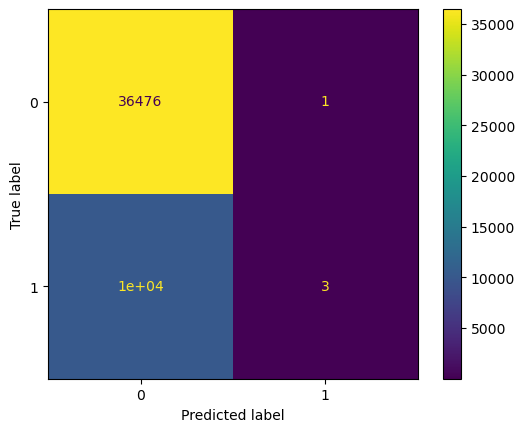



Accuracy:  0.6339559520490661
Precision:  0.3028229255774166
Recall:  0.5229466220208785
F1:  0.383545812416483
AUC:  0.6387105000191449


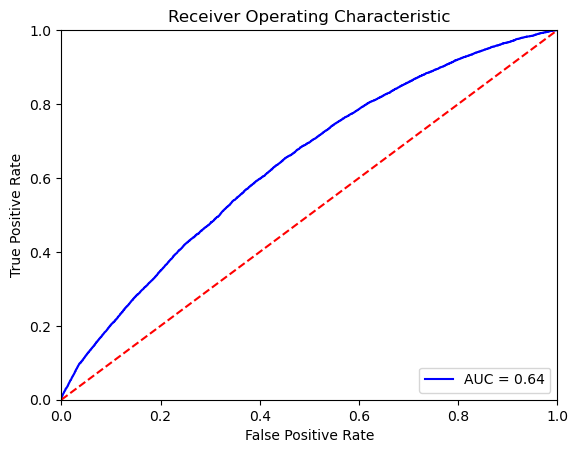

C:\Users\onwoc\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\onwoc\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


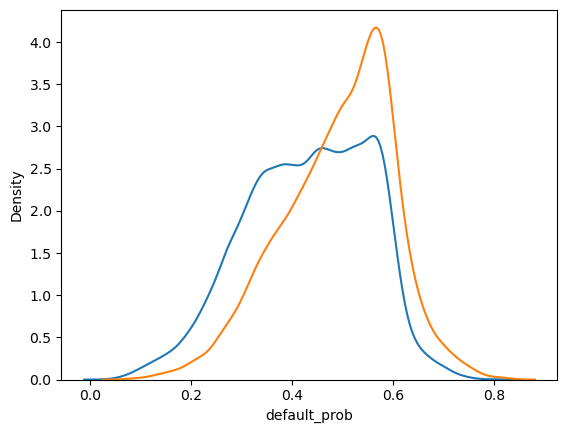

true_class  predicted_class
0           0                  0.664857
            1                  0.335143
1           1                  0.522947
            0                  0.477053
Name: predicted_class, dtype: float64


In [59]:
rfc_model = RandomForestClassifier(n_estimators = 100, max_depth = 15, class_weight='balanced')

rfc_model.fit(x_train, y_train)
eval_model(rfc_model, x_test, y_test)

### Accuracy 

- ~78% similar to the simple logistic regression model we built already

### Precision 

- The score is identical to that of the logistic regression

### Recall 
- Recall has increased dramatically, from 0.03% to 53%!
- Random Forest picked up a lot more of the actual positive cases
- It still missed most of them

### F1

- The F1 score has also increased dramatically from 0.0006 to ~0.38! 
- There is a better balance between Precision and Recall for Random Forest
- Although this is still generally poor

### AUC 

- The area under the roc curve has increased very slightly

### Probability Distributions 

- The main peak for Non defaults is inline with the peak for defaults, this makes sense as we know the model is classifying a lot of non-defaults as defaults

In [60]:
loan_df.to_csv('vehicle_loans_feat.csv')